In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
x = 2 * np.random.rand(100, 1)
y = 4 + 3 * x + np.random.rand(100, 1)

print(f'La longitud de los datos es: {len(x)}')

La longitud de los datos es: 100


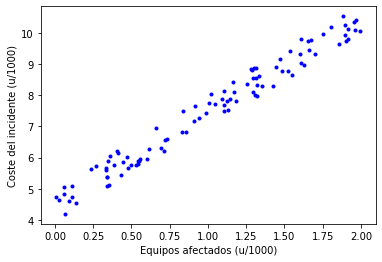

In [18]:
plt.plot(x, y, 'b.')
plt.xlabel('Equipos afectados (u/1000)')
plt.ylabel('Coste del incidente (u/1000)')
plt.show()

In [19]:
data = {'n equipos afectados': x.flatten(), 'coste': y.flatten()}
df = pd.DataFrame(data)
df

,n equipos afectados,coste
0,1.020959,8.033012
1,1.171004,8.091757
2,1.627549,8.978080
3,0.695736,6.295349
4,1.316250,8.563717
...,...,...
95,1.473764,9.157310
96,0.986882,7.428016
97,1.996629,10.049704
98,1.855678,9.640798


In [20]:
#Escalado
df['n equipos afectados'] = df['n equipos afectados'] * 1000
df['n equipos afectados'] = df['n equipos afectados'].astype('int')
df['coste'] = df['coste'] * 10000
df['coste'] = df['coste'].astype('int')
df

,n equipos afectados,coste
0,1020,80330
1,1171,80917
2,1627,89780
3,695,62953
4,1316,85637
...,...,...
95,1473,91573
96,986,74280
97,1996,100497
98,1855,96407


In [21]:
x = df['n equipos afectados']
y = df['coste']

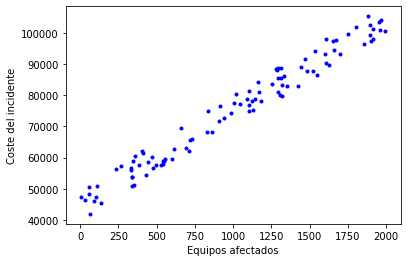

In [22]:
plt.plot(x, y, 'b.')
plt.xlabel('Equipos afectados')
plt.ylabel('Coste del incidente')
plt.show()

Construcción del modelo 

In [23]:
from sklearn.linear_model import LinearRegression

In [25]:
#Construccion del model y ajuste de la funcion hipotesis 
lin_reg = LinearRegression()
lin_reg.fit(x.values.reshape(-1, 1), y.values)

LinearRegression()

In [26]:
# Parametro theta 0
lin_reg.intercept_
# Es el punto donde la recta corta el eje y

45318.08147684877

In [27]:
# Parametro theta 1
lin_reg.coef_
# Valor de la pendiente de la funcion

array([29.5017307])

In [38]:
# Predicción para el valor minimo y maximo del conjunto de entrenamiento
x_min_max = np.array([x.min(), x.max()])
y_train_pred = lin_reg.predict(x_min_max.reshape(-1,1))

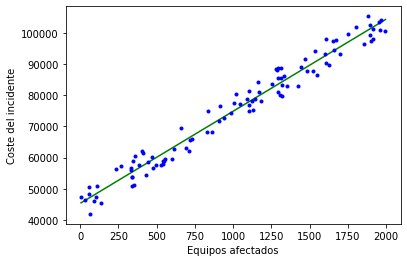

In [39]:
# Representacion grafica de la funcion hipotesis generada
plt.plot(x_min_max, y_train_pred, 'g-')
plt.plot(x, y, 'b.')
plt.xlabel('Equipos afectados')
plt.ylabel('Coste del incidente')
plt.show()

In [48]:
# Prediccion con un nuevo ejemplo
x_new = np.array([[1200]])
coste = lin_reg.predict(x_new)
print('El coste del incidente sería:', int(coste), '$')

El coste del incidente sería: 80720 $


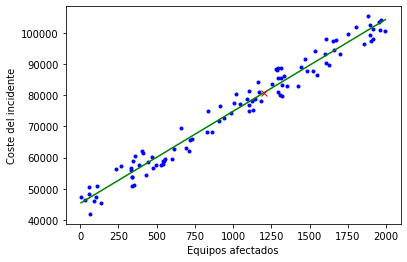

In [49]:
plt.plot(x, y, 'b.')
plt.plot(x_min_max, y_train_pred, 'g-')
plt.plot(x_new, coste, 'rx')
plt.xlabel('Equipos afectados')
plt.ylabel('Coste del incidente')
plt.show()